# Section 4.2: Single label, multiclass classification with Reuters dataset

In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words = 10000)

In [3]:
print("train data: {} samples, test data: {} samples".format(len(train_data), len(test_data)))

train data: 8982 samples, test data: 2246 samples


In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [5]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
print(train_label[0])

3


In [7]:
import numpy as np
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.0
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimensions = 46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results

In [10]:
one_hot_train_label = to_one_hot(train_label)
one_hot_test_lable = to_one_hot(test_label)

In [11]:
# another way to do one hot encode the label:
from tensorflow.keras.utils import to_categorical

one_hot_train_label = to_categorical(train_label)
one_hot_test_lable = to_categorical(test_label)

In [12]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(46, activation = 'softmax'),
])

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_label[:1000]
partial_y_train = one_hot_train_label[1000:]

In [14]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 624us/sample - loss: 2.5429 - accuracy: 0.5040 - val_loss: 1.7126 - val_accuracy: 0.6320
Epoch 2/20
7982/7982 [==============================] - 3s 324us/sample - loss: 1.4304 - accuracy: 0.6983 - val_loss: 1.3247 - val_accuracy: 0.7110
Epoch 3/20
7982/7982 [==============================] - 2s 289us/sample - loss: 1.0831 - accuracy: 0.7641 - val_loss: 1.1637 - val_accuracy: 0.7330
Epoch 4/20
7982/7982 [==============================] - 2s 252us/sample - loss: 0.8624 - accuracy: 0.8103 - val_loss: 1.0728 - val_accuracy: 0.7720
Epoch 5/20
7982/7982 [==============================] - 2s 249us/sample - loss: 0.6928 - accuracy: 0.8517 - val_loss: 0.9962 - val_accuracy: 0.7840
Epoch 6/20
7982/7982 [==============================] - 2s 251us/sample - loss: 0.5511 - accuracy: 0.8854 - val_loss: 0.9296 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 2s 248us

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


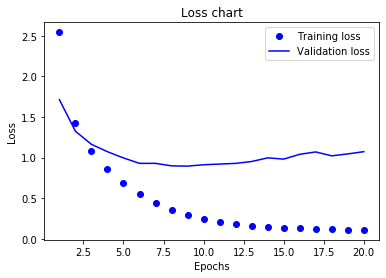

In [16]:
loss = history_dict['loss']
loss_val = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, loss_val, 'b', label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss chart")
plt.legend()
plt.show()

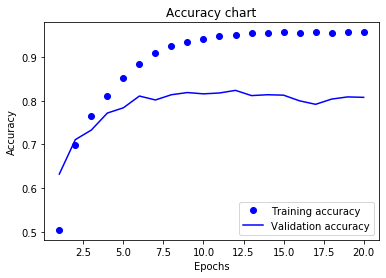

In [17]:
acc = history_dict['accuracy']
acc_val = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = "Training accuracy")
plt.plot(epochs, acc_val, 'b', label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy chart")
plt.legend()
plt.show()

### The model is overfitted since the 9th epoch, re-train a new model with 9 epochs

In [18]:
model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(46, activation = 'softmax'),
])

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 9,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 499us/sample - loss: 2.5127 - accuracy: 0.5084 - val_loss: 1.6829 - val_accuracy: 0.6170
Epoch 2/9
7982/7982 [==============================] - 2s 257us/sample - loss: 1.4080 - accuracy: 0.6939 - val_loss: 1.3237 - val_accuracy: 0.7040
Epoch 3/9
7982/7982 [==============================] - 2s 310us/sample - loss: 1.0624 - accuracy: 0.7732 - val_loss: 1.1567 - val_accuracy: 0.7580
Epoch 4/9
7982/7982 [==============================] - 2s 259us/sample - loss: 0.8402 - accuracy: 0.8197 - val_loss: 1.0604 - val_accuracy: 0.7860
Epoch 5/9
7982/7982 [==============================] - 2s 249us/sample - loss: 0.6695 - accuracy: 0.8559 - val_loss: 0.9929 - val_accuracy: 0.7890
Epoch 6/9
7982/7982 [==============================] - 2s 249us/sample - loss: 0.5345 - accuracy: 0.8856 - val_loss: 0.9639 - val_accuracy: 0.7860
Epoch 7/9
7982/7982 [==============================] - 2s 282us/sample

In [19]:
print(model.evaluate(x_test, one_hot_test_lable, verbose = 0))

[1.0171286575728404, 0.7747106]


### To ensure that the output of the model is good, we consider the performance of a random classifier

In [20]:
import copy
test_label_copy = copy.copy(test_label)
np.random.shuffle(test_label_copy)
match = np.sum(test_label_copy == test_label)
print("random match ratio: {:.3f}".format(match/len(test_label)))

random match ratio: 0.184


In [21]:
predictions = model.predict(x_test)
print(predictions.shape)

(2246, 46)


In [22]:
prediction_labels = np.argmax(predictions, axis = 1)
print(prediction_labels[:10])

[ 3 10  1  4 13  3  3  3  3  3]
